# Preparing Time Series from Wide-Form Data
- Numann Malik
- Wednesday March 29th

## Prepare the dataset for time series analysis:
- Load in the Zillow Home Value Index dataframe.
- Filter the 4 largest cities into a new dataframe.
 - Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
Therefore the 4 largest cities would have rank values of [0,1,2,3]
- Melt the data to long-form and prepare it for time series analysis.
- Convert the melted dates into datetime datatype.
- Make the datetime column the index.
- Resample the dataframe as monthly frequency, grouped by City.

- Plot the home values for all 4 cities. (Hint: use unstack)
- Make sure to add a title and axis labels.
- Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
 - Hint: use the FuncFormatter from matplotlib.
1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
 - Hint: use either pd.IndexSlice or .unstack() to get the answer.
2) How much did the home values change from November 2008 to December 2008 (in dollars)?
 - Hint: you can use .diff() to calculate the change in values

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 42
np.random.seed(SEED)

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [3]:
cities=['New York','Los Angeles','Houston','Chicago']
df = df.loc[df['RegionName'].isin(cities)]
df.rename(columns={'RegionName':'City'})
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
5843,18637,6129,Houston,city,MS,MS,NaN,Chickasaw County,NaN,NaN,...,101381.0,103471.0,106131.0,107455.0,108977.0,109825.0,110771.0,111647.0,112819.0,113808.0
8923,28591,9454,Houston,city,MO,MO,NaN,Texas County,NaN,NaN,...,141679.0,143741.0,146620.0,148156.0,149723.0,150231.0,152330.0,154355.0,156768.0,157642.0
9116,45822,9663,Houston,city,PA,PA,"Pittsburgh, PA",Washington County,NaN,NaN,...,224034.0,225472.0,228035.0,230865.0,234961.0,237660.0,239503.0,239352.0,239708.0,239428.0
10642,11987,11393,Houston,city,MN,MN,"La Crosse-Onalaska, WI-MN",Houston County,NaN,NaN,...,296239.0,299231.0,301099.0,300710.0,300953.0,302841.0,305802.0,308440.0,310836.0,313318.0
13277,11985,14518,Houston,city,AR,AR,"Little Rock-North Little Rock-Conway, AR",Perry County,50098.0,49929.0,...,106885.0,109082.0,112123.0,113450.0,114920.0,115808.0,116987.0,118147.0,119253.0,120552.0
13928,18636,15350,Houston,city,AL,AL,NaN,Winston County,NaN,NaN,...,277640.0,283458.0,290667.0,294225.0,297274.0,299510.0,301725.0,304750.0,307222.0,309040.0


In [4]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [5]:
melted = pd.melt(df,id_vars=['RegionID', 'SizeRank', 'City', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],value_name='Home Value',var_name="Date" )
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Home Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,18637,6129,Houston,city,MS,MS,NaN,Chickasaw County,2000-01-31,NaN
...,...,...,...,...,...,...,...,...,...,...
3271,11987,11393,Houston,city,MN,MN,"La Crosse-Onalaska, WI-MN",Houston County,2022-09-30,313318.0
3272,11985,14518,Houston,city,AR,AR,"Little Rock-North Little Rock-Conway, AR",Perry County,2022-09-30,120552.0
3273,18636,15350,Houston,city,AL,AL,NaN,Winston County,2022-09-30,309040.0
3274,55828,16194,Houston,city,DE,DE,"Dover, DE",Kent County,2022-09-30,331738.0


In [6]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    3276 non-null   int64         
 1   SizeRank    3276 non-null   int64         
 2   RegionName  3276 non-null   object        
 3   RegionType  3276 non-null   object        
 4   StateName   3276 non-null   object        
 5   State       3276 non-null   object        
 6   Metro       2457 non-null   object        
 7   CountyName  3276 non-null   object        
 8   Date        3276 non-null   datetime64[ns]
 9   Home Value  2558 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 256.1+ KB


In [7]:
melted = melted.set_index("Date")
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Home Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-01-31,18637,6129,Houston,city,MS,MS,NaN,Chickasaw County,NaN
...,...,...,...,...,...,...,...,...,...
2022-09-30,11987,11393,Houston,city,MN,MN,"La Crosse-Onalaska, WI-MN",Houston County,313318.0
2022-09-30,11985,14518,Houston,city,AR,AR,"Little Rock-North Little Rock-Conway, AR",Perry County,120552.0
2022-09-30,18636,15350,Houston,city,AL,AL,NaN,Winston County,309040.0


In [8]:
df_ts = melted.groupby('City').resample("MS").mean()
df_ts

/var/folders/50/3xbvh4ss3131ch53yqb8sydr0000gn/T/ipykernel_2825/101247338.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("MS").mean()


RegionID  SizeRank  Home Value
RegionName Date                                      
Chicago    2000-01-01   17426.0       3.0    166139.0
           2000-02-01   17426.0       3.0    166536.0
           2000-03-01   17426.0       3.0    167368.0
           2000-04-01   17426.0       3.0    168826.0
           2000-05-01   17426.0       3.0    170499.0
...                         ...       ...         ...
New York   2022-05-01    6181.0       0.0    768797.0
           2022-06-01    6181.0       0.0    773944.0
           2022-07-01    6181.0       0.0    777692.0
           2022-08-01    6181.0       0.0    779960.0
           2022-09-01    6181.0       0.0    781622.0

[1092 rows x 3 columns]

In [10]:
unstacked = df_ts.unstack(level=0)
unstacked

RegionID                                    SizeRank                \
RegionName  Chicago       Houston Los Angeles New York  Chicago       Houston   
Date                                                                            
2000-01-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2000-02-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2000-03-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2000-04-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2000-05-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
...             ...           ...         ...      ...      ...           ...   
2022-05-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2022-06-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2022-07-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2022-08-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   
2022-09-01  17426.0  31818.444444     12447.0   6181.0      3.0  11185.666667   

                                Home Value                             \
RegionName Los Angeles New York    Chicago        Houston Los Angeles   
Date                                                                    
2000-01-01         1.0      0.0   166139.0   92017.666667    234181.0   
2000-02-01         1.0      0.0   166536.0   92125.000000    234401.0   
2000-03-01         1.0      0.0   167368.0   92039.333333    235513.0   
2000-04-01         1.0      0.0   168826.0   92295.000000    237589.0   
2000-05-01         1.0      0.0   170499.0   92540.333333    240113.0   
...                ...      ...        ...            ...         ...   
2022-05-01         1.0      0.0   312487.0  227220.444444    990391.0   
2022-06-01         1.0      0.0   314663.0  229466.333333    992337.0   
2022-07-01         1.0      0.0   315910.0  231245.222222    992630.0   
2022-08-01         1.0      0.0   315587.0  233010.111111    978196.0   
2022-09-01         1.0      0.0   315429.0  234137.777778    966595.0   

                      
RegionName  New York  
Date                  
2000-01-01  253690.0  
2000-02-01  255517.0  
2000-03-01  257207.0  
2000-04-01  260310.0  
2000-05-01  263204.0  
...              ...  
2022-05-01  768797.0  
2022-06-01  773944.0  
2022-07-01  777692.0  
2022-08-01  779960.0  
2022-09-01  781622.0  

[273 rows x 12 columns]

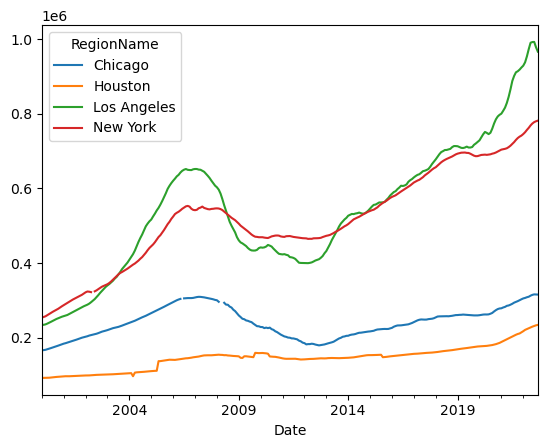

In [11]:
ax = unstacked['Home Value'].plot()

In [ ]:
# Title and axis labels
fig, ax = plt.subplots(figsize=(12,5))
ax.title("Home Values for 4 Largest US Cities")
ax.set_ylabel("Average Home Value")

In [ ]:
def thousands(x,pos):
    """function that  formats money in thousands"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatter
fmt_thous = mticks.FuncFormatter(thousands)
fig, ax = plot_compare_cols(df_ts)
## Set the axis' major formatter
ax.yaxis.set_major_formatter(fmt_thous)

In [ ]:
# create the locator to place ticks every 1 month
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

In [ ]:
final_fig,(ax1,ax2) = plot_compare_cols(state_ts)
ax1.set_xlim(left=pd.to_datetime('01/2020'))
## Set the y-axes major formatters
ax1.yaxis.set_major_formatter(fmt_mill)
ax2.yaxis.set_major_formatter(fmt_thous)
## customize minor ticks
ax1.xaxis.set_minor_locator(loc_3months)
ax1.xaxis.set_minor_formatter(fmt_months)
# ## customize major ticks
ax1.xaxis.set_major_locator(loc_year)
ax1.xaxis.set_major_formatter(fmt_year)
## Making major/minor gridlines visually different
ax1.grid(which='minor',axis='x',ls=":",lw=1)
ax1.grid(which='major',axis='x',color='k')
final_fig.autofmt_xdate(which='major',rotation=90,ha='center')